# Experimentacion

**DISCLAIMER:** Estoy familiarizandome con las herramientas que mostro el profe la semana pasada. Primero agarre como variable 'Adult mortality' para ver la regresion con 'Life expectancy', pero es obvio que estan super relacionadas. No me parece muy interesante ese analisis, asi que lo voy a checar con otros modelos.

La idea que tenia de la experimentacion era la siguiente: 
- Calcular residuo y residuo ajustado de varias variables distintas (varios modelos, ver en que se diferencia cada modelo, que tiene de interesante cada uno y por que son unicos entre si. Fijarme si vale la pena obtener las mejores variables para developing, developed, y mezclados.
- Analizar outliers de la muestra, por que lo son, por que son casos extranos. 
- Miro como cambian mis modelos sacando varios outliers con criterio de residuos y Cook

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm


def rmse(fitted, target):
    rmse = np.sqrt(mean_squared_error(target, fitted))
    return rmse

def adjusted_r2(p, fitted, target):
    n=len(target)
    return 1 - (1-r2_score(target, fitted)) * (n-1) / (n-p-1)

def standarized_residual_plot(predicted, actual):
    residuals = actual - predicted
    standarized_residuals = residuals/np.std(residuals)
    plt.scatter(predicted, standarized_residuals)
    plt.xlabel("Predicciones")
    plt.ylabel("Residuos standarizados")
    plt.hlines(0, xmin=min(predicted), xmax=max(predicted))
    plt.title("Residuos standarizados")
    return standarized_residuals

def ols_influence(lm):
    plt.figure(figsize=(30,30))
    sm.graphics.influence_plot(lm, alpha  = 0.05, criterion="cooks")
    plt.show()

    
def run_analysis(predictors, dataset):
    target = dataset['Life expectancy']
    p=len(predictors)
    features= dataset[predictors].to_numpy()
    if len(predictors)>1:
        for i in range(0, len(predictors)):
            print(f"VIF for {predictors[i]} {variance_inflation_factor(features, i)}")

    features = sm.add_constant(features)
    regr = sm.OLS(target, features).fit()
    fitted = regr.predict(features)
    print(regr.summary())
    standarized_residuals = standarized_residual_plot(fitted, target)
    ols_influence(regr)
    #sm.qqplot(regr.resid)
    plt.figure()
    plt.hist(regr.resid)
    plt.show()
    return {
        'model': regr,
        'r2':r2_score(target, fitted),
        'rmse':rmse(fitted, target),
        'adjusted':adjusted_r2(p, fitted, target),
        'standarized_residuals': standarized_residuals,
        'fitted': fitted
    }

# Me da los residuos estandarizados
def residuos(predictors, dataset):
    target = dataset['Life expectancy']
    p=len(predictors)
    features= dataset[predictors].to_numpy()
    if len(predictors)>1:
        for i in range(0, len(predictors)):
            print(f"VIF for {predictors[i]} {variance_inflation_factor(features, i)}")

    features = sm.add_constant(features)
    regr = sm.OLS(target, features).fit()
    fitted = regr.predict(features)
    standarized_residuals = standarized_residual_plot(fitted, target)
    return np.array(standarized_residuals)


df = pd.read_csv("expectativa_de_vida.csv")

#### Como la cantidad de filas (paises) en el dataset no es demasiado significativa (miles y miles de elementos), no hare un train set que intente ser un fiel representante de todos los datos de la tabla. Sino que utilizare a todos los paises del dataset para realizar experimentos. 
#### En algunos casos, en vez de incluir a todos, me centrare en ciertos grupos en especifico, excluyendo a toda la muestra. Pero esto sera con la intencion de querer demostrar cierta anomalia o dato interesante que nos puedan proveer los datos. Como ejemplo, vere como segmentar y emplear regresion solo con paises encasillados en la condicion de 'Developing' y los que se encuentran en 'Developed'. Tambien habra un modelo con todos los paises, y otro donde no haya outliers. Se trataran a los outliers con suficiente detenimiento para entender su condicion, por que se salen tanto de la norma, son creibles sus datos? O simplemente estan encasillados en una categoria que no les corresponde si se la compara con el resto de su informacion?

In [2]:
df

,Unnamed: 0,Country,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status
0,0,Afghanistan,58.19375,269.0625,78.2500,0.014375,34.960110,64.562500,2362.2500,15.51875,...,8.252500,52.3125,0.10000,340.015425,9.972260e+06,16.58125,15.58125,0.415375,8.21250,Developing
1,1,Albania,75.15625,45.0625,0.6875,4.848750,193.259091,98.000000,53.3750,49.06875,...,5.945625,98.0625,0.10000,2119.726679,6.969116e+05,1.61875,1.70000,0.709875,12.13750,Developing
2,2,Algeria,73.61875,108.1875,20.3125,0.406667,236.185241,78.000000,1943.8750,48.74375,...,4.604000,91.8750,0.10000,2847.853392,2.164983e+07,6.09375,5.97500,0.694875,12.71250,Developing
3,3,Angola,49.01875,328.5625,83.7500,5.740667,102.100268,70.222222,3561.3125,18.01875,...,3.919333,47.6875,2.36875,1975.143045,1.014710e+07,6.19375,6.66875,0.458375,8.04375,Developing
4,4,Antigua and Barbuda,75.05625,127.5000,0.0000,7.949333,1001.585226,98.266667,0.0000,38.42500,...,4.791333,98.3125,0.12500,9759.305728,NaN,3.42500,3.37500,0.488625,8.84375,Developing
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,188,Venezuela (Bolivarian Republic of),73.38750,163.0000,9.3750,7.420000,0.000000,66.250000,165.0000,54.48750,...,4.998667,68.5000,0.10000,NaN,NaN,1.65000,1.56250,0.726812,12.78750,Developing
179,189,Viet Nam,74.77500,126.5625,29.1875,3.087333,0.000000,87.538462,4232.9375,11.18750,...,5.977333,91.7500,0.14375,NaN,NaN,14.92500,15.62500,0.627063,11.51250,Developing
180,190,Yemen,63.86250,211.8125,39.3750,0.047333,0.000000,55.687500,2761.1875,33.48750,...,5.005333,72.6250,0.10000,NaN,NaN,13.83125,13.75000,0.475500,8.50625,Developing
181,191,Zambia,53.90625,354.3125,33.4375,2.239333,89.650407,69.818182,6563.8125,17.45000,...,5.824000,74.2500,11.93125,811.811841,6.260246e+06,6.88125,6.76250,0.498437,11.21250,Developing


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183 entries, 0 to 182
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       183 non-null    int64  
 1   Country                          183 non-null    object 
 2   Life expectancy                  183 non-null    float64
 3   Adult Mortality                  183 non-null    float64
 4   infant deaths                    183 non-null    float64
 5   Alcohol                          182 non-null    float64
 6   percentage expenditure           183 non-null    float64
 7   Hepatitis B                      174 non-null    float64
 8   Measles                          183 non-null    float64
 9   BMI                              181 non-null    float64
 10  under-five deaths                183 non-null    float64
 11  Polio                            183 non-null    float64
 12  Total expenditure     

Vemos que 'Status' es de tipo object, no float, como nos es de sumo interes incluirlo en la experimentacion, proximamente vamos a hacer que tenga un valor numerico.

### Gracias al analisis exploratorio de datos provisto en 'EDA.ipynb' se puede descartar la siguiente data:

#### <b>Features 
 - **Hepatitis B**: Se correlaciona mucho con Polio y Diphteria
 - **Alcohol**: No parece ser un indicador que ayude a explicar la expectativa de vida
 - **GDP**: Puede ser reemplazado por Percentage Expenditure
 - **Population**: Se puede reemplazar por Infant Deaths y Under-Five Deaths
 - **Income Composition of Resources y Schooling**: Ambos correlacionan fuerte con BMI

#### <b> Paises
 - **Sudan, Sudan del Sur, Corea del Norte y Somalia**: Todos ellos tienen data incompleta

### Saco a los paises nombrados mas arriba del dataset

In [4]:
df_new = df[(df["Country"] != "South Sudan")] # Borro a Sudan del Sur

In [5]:
df_new = df_new[(df_new["Country"] != "Sudan")] # Borro a Sudan

In [6]:
df_new = df_new[(df_new["Country"] != "Democratic People's Republic of Korea")] # Borro a Corea del Norte

In [7]:
df_new = df_new[(df_new["Country"] != "Somalia")] # Borro a Somalia

In [8]:
print(df.shape) # Con todos los paises
print(df_new.shape) # Sin esos paises (TENGO QUE HACER MENOS REPETITIVA LA ELIMINACION DE PAISES > BUSCAR EN GOOGLE)

(183, 22)
(179, 22)


### Ya tengo mi muestra sin los paises que puedan llegar a truncar la experimentacion. Ahora me encargo de tener tres muestras distintas: Los paises de status 'Developing', los de estado 'Developed', y todas las naciones juntas.

In [9]:
df_developed = df_new[(df_new["Status"] == "Developed")] # Los developed
df_developing = df_new[(df_new["Status"] == "Developing")] # Los developing
# df_new es el que contiene a todas las naciones juntas

In [10]:
print(df_developed.shape)
print(df_developing.shape)

(32, 22)
(147, 22)


## Busco variables para mis muestras de regresion: Empiezo con el data set que contiene a todos los paises

In [11]:
df_new['Status_Float'] = df_new['Status'].apply(lambda x: 0 if x=='Developing' else 1)

In [12]:
df_new.corr()['Life expectancy']

Unnamed: 0                         0.009284
Life expectancy                    1.000000
Adult Mortality                   -0.892716
infant deaths                     -0.200913
Alcohol                            0.453856
percentage expenditure             0.523687
Hepatitis B                        0.402502
Measles                           -0.203355
BMI                                0.722210
under-five deaths                 -0.226052
Polio                              0.668041
Total expenditure                  0.279391
Diphtheria                         0.658709
HIV/AIDS                          -0.598270
GDP                                0.609940
Population                        -0.042260
thinness  1-19 years              -0.523232
thinness 5-9 years                -0.515666
Income composition of resources    0.814026
Schooling                          0.794511
Status_Float                       0.500508
Name: Life expectancy, dtype: float64

Veo que la columna con la que mas se correlaciona es 'Adult Mortality', hago un analisis entre ambas variables para ver que conclusiones puedo sacar de entrada

Primero normalizo las variables

In [13]:
features_a_normalizar = ['Life expectancy','Adult Mortality']
for feature in features_a_normalizar:
    df_new[f'Normalizado_{feature}'] = (df_new[feature]-np.mean(df_new[feature]))/np.std(df_new[feature])

Life expectancy normalizada

In [14]:
df_new[['Life expectancy', 'Normalizado_Life expectancy']]

,Life expectancy,Normalizado_Life expectancy
0,58.19375,-1.236622
1,75.15625,0.628375
2,73.61875,0.459329
3,49.01875,-2.245397
4,75.05625,0.617380
...,...,...
178,73.38750,0.433904
179,74.77500,0.586457
180,63.86250,-0.613353
181,53.90625,-1.708025


Adult mortality normalizada

In [15]:
df_new[['Adult Mortality', 'Normalizado_Adult Mortality']]

,Adult Mortality,Normalizado_Adult Mortality
0,269.0625,1.119401
1,45.0625,-1.234388
2,108.1875,-0.571071
3,328.5625,1.744627
4,127.5000,-0.368135
...,...,...
178,163.0000,0.004898
179,126.5625,-0.377987
180,211.8125,0.517819
181,354.3125,2.015207


Realizamos el analisis de la regresion

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.797
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     694.7
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.55e-63
Time:                        16:57:13   Log-Likelihood:                -506.49
No. Observations:                 179   AIC:                             1017.
Df Residuals:                     177   BIC:                             1023.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.4411      0.308    225.414      0.0

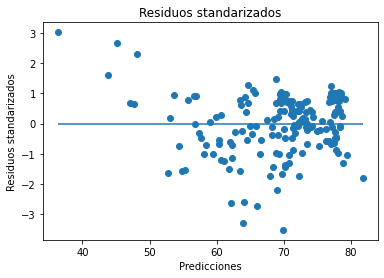

<Figure size 2160x2160 with 0 Axes>

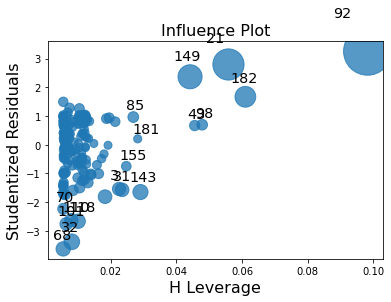

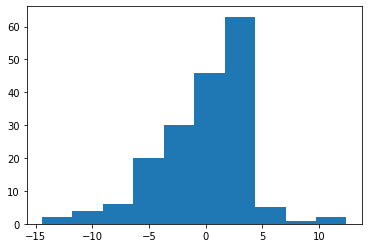

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd444046760>,
 'r2': 0.7969422820183526,
 'rmse': 4.098468280655677,
 'adjusted': 0.7957950632726936,
 'standarized_residuals': 0     -0.526640
 1     -1.050961
 2     -0.112012
 3     -1.526655
 4      0.640761
          ...   
 178    0.972609
 179    0.552622
 180   -0.335288
 181    0.201908
 182    1.617318
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.35216543, 79.46357881, 74.07782894, 55.27569625, 72.43010943,
        74.26446384, 73.29396238, 77.91717538, 77.69854593, 73.48059728,
        70.33446617, 77.73054048, 71.24631095, 76.68538506, 64.64476804,
        77.31994371, 70.04118276, 60.3255033 , 63.66360173, 68.16416895,
        77.76786746, 45.07476607, 70.45177953, 77.58656499, 72.60074705,
        61.76525822, 58.43249221, 73.39527847, 66.55377641, 58.14987366,
        77.79452959, 54.89176161, 63.87689876, 77.8798484 , 77.01599545,
        72.70739556, 62.75175695, 

In [16]:
run_analysis(['Normalizado_Adult Mortality'], df_new)

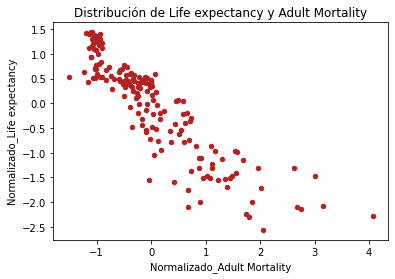

In [17]:
fig, ax = plt.subplots()

df_new.plot(
    x    = 'Normalizado_Adult Mortality',
    y    = 'Normalizado_Life expectancy',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)

#ACA PONDRIA LA RECTA DE REGRESION CON LA FUNCION DE C++

ax.set_title('Distribución de Life expectancy y Adult Mortality');

#### Interpreto los graficos

- En el primer grafico de 'Residuos standarizados' se puede notar como los puntos de arriba a la izquierda y varios de abajo a la derecha se desvian bastante de la linea de regresion. No dan los valores que se predicen, por lo tanto se los puede llamar outliers ya que su desvio es > 2.5. 
- Luego se realiza un grafico de influencia que muestra:  
    En el **eje 'x'** que tanto afecta un punto al resto de la muestra. En el **eje 'y'** que tanto se modifica la recta de regresion. Y en el **diametro de los circulos** que tan grande es la distancia de Cook. O sea, a mayor diametro, mas varia el modelo de regresion dicho punto.
    Notamos que los paises numerados con **92, 182, 21, 149** por ejemplo, traccionan bastante al modelo, seguro estos son los outliers que nos interesan.
- El ultimo es un histograma de los residuos de los indices de los paises evaluados

#### Outliers

In [24]:
df_new.iloc[92] #Mayor dist de Cook: Liberia

Unnamed: 0                                  95
Country                                Liberia
Life expectancy                         57.525
Adult Mortality                        246.938
infant deaths                          10.6875
Alcohol                                  3.258
percentage expenditure                 25.2717
Hepatitis B                             49.125
Measles                                705.312
BMI                                    19.9875
under-five deaths                        14.75
Polio                                  59.4375
Total expenditure                        6.844
Diphtheria                             40.6875
HIV/AIDS                               2.28125
GDP                                    246.282
Population                         2.78894e+06
thinness  1-19 years                    7.8375
thinness 5-9 years                      7.7625
Income composition of resources       0.389438
Schooling                              9.86875
Status       

In [25]:
df_new.iloc[21] #Botswana, un caso extremo de Adult Mortality, muy por fuera de la media

Unnamed: 0                                  21
Country                               Botswana
Life expectancy                          56.05
Adult Mortality                        448.125
infant deaths                                2
Alcohol                                   4.67
percentage expenditure                 334.267
Hepatitis B                            87.3125
Measles                                237.875
BMI                                    32.2437
under-five deaths                        3.125
Polio                                  96.1875
Total expenditure                      5.51067
Diphtheria                             95.8125
HIV/AIDS                                16.525
GDP                                    4498.29
Population                         1.06387e+06
thinness  1-19 years                    7.4375
thinness 5-9 years                      7.8125
Income composition of resources       0.630375
Schooling                              12.1375
Status       

Chequeo outliers basandome en las desviaciones de los residuos

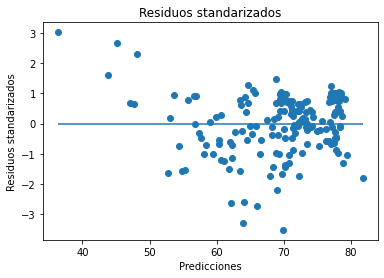

In [26]:
residuos_adult = residuos(['Normalizado_Adult Mortality'], df_new)

<AxesSubplot:xlabel='Normalizado_Adult Mortality', ylabel='Count'>

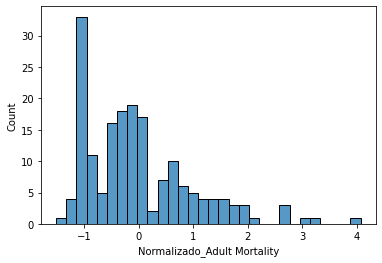

In [27]:
sns.histplot(df_new["Normalizado_Adult Mortality"], bins=30)

/home/tincho/.local/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

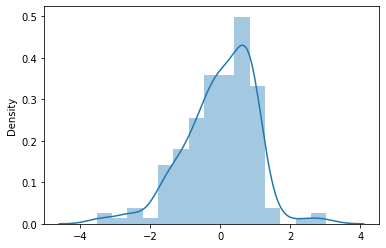

In [28]:
sns.distplot(residuos_adult)

Tengo que atender los casos donde el modulo del residuo sea mayor a 2.5, ellos son outliers

Notamos que tanto el R2 como el R2 ajustado nos muestran una performance bastante aceptable, por arriba de los 0.7, algo ideal en el analisis de datos. Ahora hay que chequear los graficos, como se interpretan?

In [29]:
df_adult = df_new.assign(residuos_am = residuos_adult)

In [30]:
df_adult.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 0 to 182
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       179 non-null    int64  
 1   Country                          179 non-null    object 
 2   Life expectancy                  179 non-null    float64
 3   Adult Mortality                  179 non-null    float64
 4   infant deaths                    179 non-null    float64
 5   Alcohol                          179 non-null    float64
 6   percentage expenditure           179 non-null    float64
 7   Hepatitis B                      170 non-null    float64
 8   Measles                          179 non-null    float64
 9   BMI                              179 non-null    float64
 10  under-five deaths                179 non-null    float64
 11  Polio                            179 non-null    float64
 12  Total expenditure     

Armo un array con los outliers de los residuos, y los outliers del grafico de influencia

In [31]:
quita_adult = np.where((df_adult["residuos_am"]**2)**0.5 > 2.5) # Outliers segun residuos
quita_adult = quita_adult[0]

In [32]:
cook_adult = np.array([92, 43, 98, 149, 182])

In [33]:
chau_outliers = np.concatenate([quita_adult, cook_adult])
print(chau_outliers)

[ 21  32  67  91 100 109 117  92  43  98 149 182]


#### Quita de Outliers

In [34]:
df_adult_quita = df_adult.drop(chau_outliers, axis=0)

                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     757.8
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.43e-63
Time:                        16:57:56   Log-Likelihood:                -450.71
No. Observations:                 167   AIC:                             905.4
Df Residuals:                     165   BIC:                             911.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         69.2413      0.282    245.231      0.0

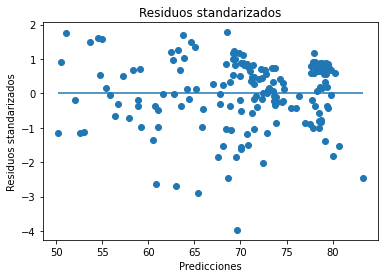

<Figure size 2160x2160 with 0 Axes>

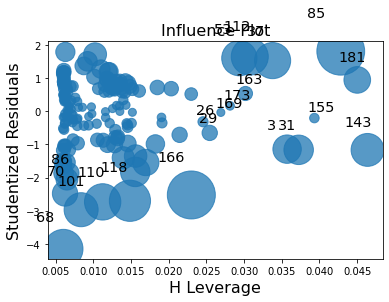

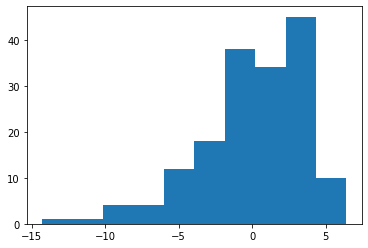

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd43bd88be0>,
 'r2': 0.8211967861394968,
 'rmse': 3.596271577585674,
 'adjusted': 0.8201131302979179,
 'standarized_residuals': 0     -0.188082
 1     -1.535377
 2     -0.254023
 3     -1.128589
 4      0.668512
          ...   
 177   -0.070777
 178    1.165523
 179    0.564926
 180   -0.161632
 181    0.927545
 Name: Life expectancy, Length: 167, dtype: float64,
 'fitted': array([58.87014377, 80.67788376, 74.53228739, 53.07746283, 72.65209998,
        74.7452536 , 73.6378293 , 78.91330658, 78.66383188, 73.85079551,
        70.26079367, 78.70034037, 71.30128573, 77.50772959, 63.76836662,
        78.23181471, 69.92613248, 58.83972002, 62.64877282, 67.78430088,
        78.74293361, 70.39465815, 78.53605215, 72.84681195, 60.48260222,
        56.67963417, 73.75343953, 65.94670672, 56.35714248, 78.77335736,
        52.63936091, 78.87071334, 77.88498402, 72.96850693, 61.60828076,
        53.64334448, 78.31091644, 

In [35]:
run_analysis(['Normalizado_Adult Mortality'], df_adult_quita)

#### Mejoro el R2 y el Ajuste, la distribucion de los residuos es mas lineal, y el grafico de influencia ya no muestra tantos puntos apalancando demasiado la muestra

## Agrego ahora el status de los paises como variable

VIF for Normalizado_Adult Mortality 1.1567230271897124
VIF for Status_Float 1.1567230271897122
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     400.1
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           3.34e-66
Time:                        16:57:57   Log-Likelihood:                -495.84
No. Observations:                 179   AIC:                             997.7
Df Residuals:                     176   BIC:                             1007.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

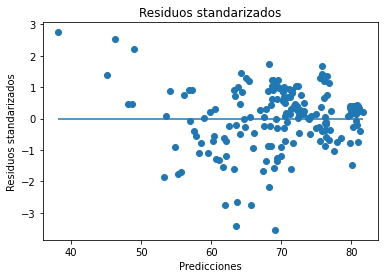

<Figure size 2160x2160 with 0 Axes>

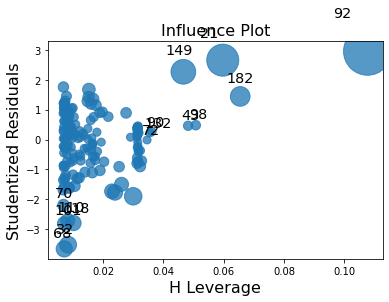

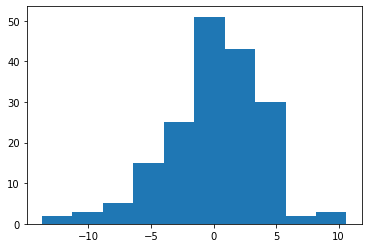

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fd43bcb1370>,
 'r2': 0.8197173350637883,
 'rmse': 3.8617914110837264,
 'adjusted': 0.8176686684167859,
 'standarized_residuals': 0     -0.554291
 1     -0.738875
 2      0.152822
 3     -1.714372
 4      0.919670
          ...   
 178    1.212920
 179    0.827685
 180   -0.256169
 181    0.077380
 182    1.400138
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.3343058 , 78.00963146, 73.02858266, 55.63929743, 71.50467763,
        73.20119326, 72.30361813, 80.49967456, 80.29747357, 72.47622873,
        69.56650715, 76.40681873, 70.40983324, 75.44019935, 64.30434965,
        79.94732063, 69.29526192, 60.30964715, 63.39691106, 67.55929243,
        76.44134085, 46.20489509, 69.67500524, 76.27366198, 75.58273826,
        61.64121465, 58.55888247, 72.39732103, 66.06990952, 58.2975007 ,
        76.4659995 , 55.28421276, 63.59418032, 76.54490721, 75.74596671,
        71.76112766, 62.55358497,

In [36]:
run_analysis(['Normalizado_Adult Mortality', 'Status_Float'], df_new)

In [37]:
df.corr()["BMI"]

Unnamed: 0                         0.021571
Life expectancy                    0.723824
Adult Mortality                   -0.621810
infant deaths                     -0.286579
Alcohol                            0.450205
percentage expenditure             0.364079
Hepatitis B                        0.300396
Measles                           -0.309725
BMI                                1.000000
under-five deaths                 -0.300138
Polio                              0.506371
Total expenditure                  0.391820
Diphtheria                         0.492614
HIV/AIDS                          -0.340577
GDP                                0.466903
Population                        -0.149859
thinness  1-19 years              -0.714633
thinness 5-9 years                -0.717365
Income composition of resources    0.681697
Schooling                          0.721263
Name: BMI, dtype: float64

## Pruebo variables para hacer otros analisis

VIF for BMI 1.3845854353133478
VIF for Status_Float 1.384585435313348
                            OLS Regression Results                            
Dep. Variable:        Life expectancy   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.572
Method:                 Least Squares   F-statistic:                     120.0
Date:                Fri, 05 Nov 2021   Prob (F-statistic):           1.36e-33
Time:                        13:06:25   Log-Likelihood:                -572.21
No. Observations:                 179   AIC:                             1150.
Df Residuals:                     176   BIC:                             1160.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------

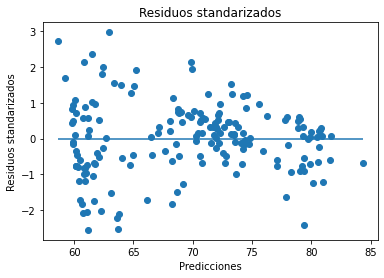

<Figure size 2160x2160 with 0 Axes>

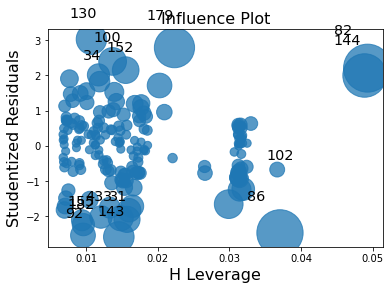

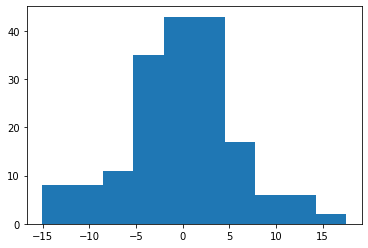

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper at 0x7fa88d529850>,
 'r2': 0.5768273965204069,
 'rmse': 5.9165780692373335,
 'adjusted': 0.5720186169354116,
 'standarized_residuals': 0     -0.338272
 1      0.507565
 2      0.267280
 3     -2.039603
 4      1.131860
          ...   
 178   -0.117818
 179    2.725157
 180   -0.462626
 181   -1.179272
 182   -2.220205
 Name: Life expectancy, Length: 179, dtype: float64,
 'fitted': array([60.19515982, 72.15320314, 72.03736516, 61.08622117, 68.35950944,
        74.26056323, 70.59830108, 80.64443397, 77.94451808, 70.29088492,
        73.5120717 , 73.07545164, 59.25286244, 71.05051472, 74.1759124 ,
        78.87344954, 68.09219103, 61.65427278, 60.93028543, 70.63839884,
        72.11533303, 66.15636025, 71.4381264 , 65.25638829, 80.15880554,
        60.18847686, 60.12164725, 63.35174465, 60.13946848, 63.08219859,
        74.57466236, 60.75430081, 60.48029945, 74.47664561, 62.43617911,
        72.32250479, 61.17087199,

In [57]:
run_analysis(['BMI', 'Status_Float'], df_new)